In [104]:
#import your necessary libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn .metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns 
import joblib
import os
from sklearn.preprocessing import LabelEncoder

In [3]:
#import necessary dataset
df=pd.read_csv(r"C:\Users\itiol\Downloads\diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
##predict diabetes status --either diabetic or non-diabetic

In [12]:
#check Outcome column
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
#check the column profile
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

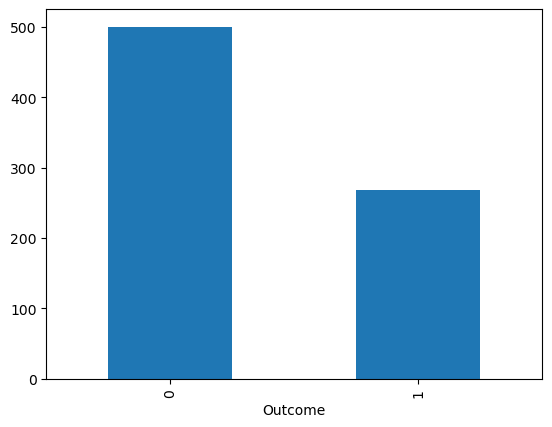

In [14]:
df['Outcome'].value_counts().plot(kind='bar')

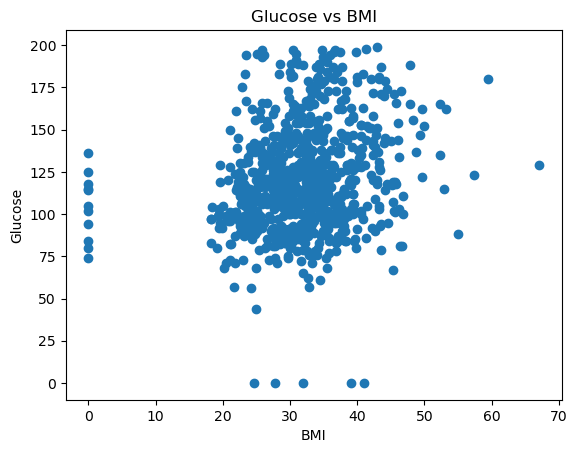

In [16]:
##Visulaise key variables(Glucose&BMI) to examine their relationship
plt.scatter(df['BMI'], df['Glucose'])
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Glucose vs BMI')
plt.show()

<Axes: >

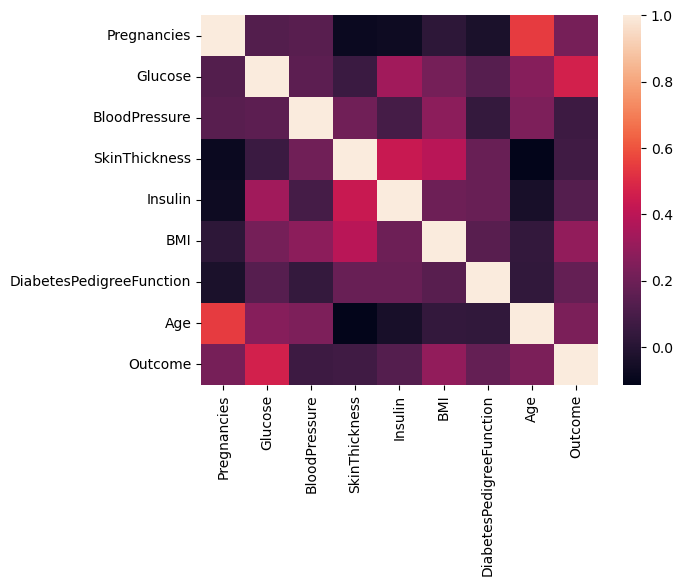

In [17]:
sns.heatmap(data = df.corr())

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
##we can see from the above correlation table that Glucose is the most influential predictor, it shows the strongest positive  
##relationship with the diabetes outcome compared to other features. The next best predictor is BMI. 


In [20]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,True,True,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
763,False,False,False,False,False
764,False,False,False,True,False
765,False,False,False,False,False
766,False,False,True,True,False


In [21]:
(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [23]:
cols_with_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [24]:
for col in cols_with_invalid_zero:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

In [25]:
(df[cols_with_invalid_zero] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [26]:
##Build a logistic regression model to predict diabetes status using predictors such as BMI, Glucose, Insulin, Age

In [27]:
x = df[['BMI', 'Glucose', 'Insulin', 'Age']]
y = df['Outcome']

In [29]:
##Training set = 80% data
##Testing set = 20% data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [31]:
x_train 

,BMI,Glucose,Insulin,Age
60,32.0,84,30.5,21
618,28.2,112,30.5,50
346,28.7,139,83.0,22
294,21.9,161,30.5,65
231,46.2,134,370.0,46
...,...,...,...,...
71,28.6,139,140.0,26
106,22.4,96,30.5,27
270,45.6,101,30.5,38
435,42.4,141,30.5,29


In [32]:
x_train.shape

(614, 4)

In [33]:
y_train.shape

(614,)

In [39]:
x_test

,BMI,Glucose,Insulin,Age
668,34.0,98,190.0,43
324,35.7,112,30.5,21
624,30.8,108,30.5,21
690,24.6,107,30.5,34
473,29.9,136,30.5,50
...,...,...,...,...
355,30.4,165,30.5,49
534,33.3,77,56.0,24
344,36.8,95,30.5,57
296,28.0,146,360.0,29


In [34]:
x_test.shape

(154, 4)

In [35]:
y_test.shape

(154,)

In [40]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [36]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred_lr =lr.predict(x_test)

In [38]:
y_pred_lr

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [42]:
print(accuracy_score(y_test,y_pred_lr)*100)

74.67532467532467


In [43]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [44]:
y_pred_model = model.predict(x_test)

In [45]:
y_pred_model

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [46]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [47]:
accuracy_score(y_test,y_pred_model)

0.7467532467532467

In [50]:
##now scaling my data 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [51]:
x_train_scaled

array([[-0.05024677, -1.25688146, -0.61269674, -1.03594038],
       [-0.59858988, -0.32605067, -0.61269674,  1.48710085],
       [-0.52643947,  0.57153617, -0.12042886, -0.94893896],
       ...,
       [ 1.91224437, -0.69173419, -0.61269674,  0.44308379],
       [ 1.45048175,  0.63802409, -0.61269674, -0.33992901],
       [-1.42110454,  0.10612077, -0.61269674, -1.03594038]])

In [52]:
x_test_scaled

array([[ 0.23835487, -0.79146606,  0.88285995,  0.87809089],
       [ 0.48366626, -0.32605067, -0.61269674, -1.03594038],
       [-0.22340775, -0.45902649, -0.61269674, -1.03594038],
       [-1.11807282, -0.49227045, -0.61269674,  0.0950781 ],
       [-0.35327849,  0.4718043 , -0.61269674,  1.48710085],
       [ 0.7722679 , -0.62524628,  0.88285995,  1.92210795],
       [-1.72413626, -1.6890529 , -0.18606458, -0.94893896],
       [ 0.20949471, -0.15983088, -0.61269674,  0.96509232],
       [-0.15125734,  1.07019553,  0.28276197,  0.35608237],
       [ 0.19506462,  0.83748783, -0.61269674,  2.79212217],
       [-0.69960045, -0.35929462, -0.61269674,  0.61708663],
       [ 0.26721503,  1.90129445, -0.61269674,  2.35711506],
       [-0.20897767,  0.87073179,  2.08305591, -0.33992901],
       [ 0.18063454, -0.85795398, -0.27045336,  0.87809089],
       [-0.56972971, -1.12390563, -0.74865644, -0.94893896],
       [ 0.1373443 ,  0.10612077,  0.66719973, -0.42693043],
       [ 0.70011749, -1.

In [55]:
model = SVC(kernel='linear', random_state=42)
model.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [56]:
x_train_scaled

array([[-0.05024677, -1.25688146, -0.61269674, -1.03594038],
       [-0.59858988, -0.32605067, -0.61269674,  1.48710085],
       [-0.52643947,  0.57153617, -0.12042886, -0.94893896],
       ...,
       [ 1.91224437, -0.69173419, -0.61269674,  0.44308379],
       [ 1.45048175,  0.63802409, -0.61269674, -0.33992901],
       [-1.42110454,  0.10612077, -0.61269674, -1.03594038]])

In [57]:
##training accuracy 
y_train_pred = model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [79]:
##testaccuracy
y_test_pred = model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [80]:
y_train_pred = model.predict(x_train_scaled)

In [81]:
accuracy_score(y_train,y_train_pred)

0.7671009771986971

In [82]:
print(accuracy_score(y_train,y_train_pred)*100)

76.71009771986971


In [83]:
y_test_pred = model.predict(x_test_scaled)

In [84]:
accuracy_score(y_test,y_test_pred)

0.7532467532467533

In [85]:
print(accuracy_score(y_test,y_test_pred)*100)

75.32467532467533


In [86]:
y_test_pred = model.predict(x_test_scaled)

In [87]:
#The Confusion Matrix
print(confusion_matrix(y_test,y_test_pred))

[[82 17]
 [21 34]]


In [88]:
##Let's define class labels, 0 representing negative non diabetic individuals 
## 1 representing positive diabetic individuals

In [89]:
Label = ['0: Negative', '1: Positive']

In [90]:
pd.DataFrame(data = confusion_matrix(y_test, y_test_pred), index=Label, columns=Label)

,0: Negative,1: Positive
0: Negative,82,17
1: Positive,21,34


In [91]:
## From the above confusion table 
## 82 patients are true negatives and correctly predicted as negative 
## 17 patients are false positives, they are actually negative and incorrectly predicted as positive
## 21 patients are false negatives, they are actually positive but incorrectly predicted as negative
## 34 patients are true positives, and correctly predicted as positive 

In [92]:
print(accuracy_score(y_test,y_test_pred)*100)
print(precision_score(y_test,y_test_pred)*100)
print(recall_score(y_test,y_test_pred)*100)
print(f1_score(y_test,y_test_pred)*100)

75.32467532467533
66.66666666666666
61.81818181818181
64.15094339622641


In [99]:
accuracy  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
f1        = f1_score(y_test, y_test_pred)

In [100]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values  = [accuracy, precision, recall, f1]

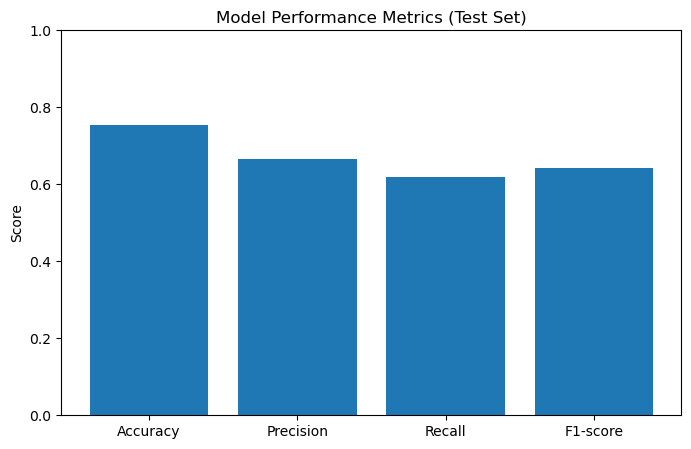

In [101]:
plt.figure(figsize=(8,5))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics (Test Set)')
plt.show()

In [105]:
os.makedirs('model', exist_ok=True)

In [107]:
joblib.dump(model, 'model/svm_model.pkl')

['model/svm_model.pkl']

In [108]:
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']

In [109]:
# Load model and scaler

In [110]:
model = joblib.load("model/svm_model.pkl")

In [111]:
scaler = joblib.load("model/scaler.pkl")

In [112]:
print("Diabetes Prediction (0 = Negative, 1 = Positive)")

Diabetes Prediction (0 = Negative, 1 = Positive)


In [113]:
# Collect user input

In [115]:
bmi = float(input("Enter BMI: "))
glucose = float(input("Enter Glucose: "))
insulin = float(input("Enter Insulin: "))
age = float(input("Enter Age: "))

Enter BMI:  22
Enter Glucose:  27
Enter Insulin:  31
Enter Age:  38


In [117]:
# Prepare input (same order as training)

In [118]:
user_data = np.array([[bmi, glucose, insulin, age]])

In [119]:
# Scale input

In [120]:
user_data_scaled = scaler.transform(user_data)

C:\Users\itiol\OneDrive\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [121]:
# Predict
prediction = model.predict(user_data_scaled)[0]

In [122]:
# Output result
if prediction == 1:
    print("Prediction: Positive")
else:
    print("Prediction: Negative")

Prediction: Negative
